In [291]:
from os import waitid
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

jeseniovaPath = '/content/drive/MyDrive/Cimathon 2023/jeseniova,-bratislava-air-quality.csv'
kamennePath = '/content/drive/MyDrive/Cimathon 2023/kamenne-nam., bratislava-air-quality.csv'
mamateyovaPath = '/content/drive/MyDrive/Cimathon 2023/mamateyova,-bratislava, slovakia-air-quality.csv'
puchovskaPath = '/content/drive/MyDrive/Cimathon 2023/puchovska,-bratislava-air-quality.csv'
trnavskemytoPath = '/content/drive/MyDrive/Cimathon 2023/trnavske-myto, bratislava-air-quality.csv'

weatherPath = '/content/drive/MyDrive/Cimathon 2023/weather_data_edited-Sheet1-4.csv'


jeseniovaDF = pd.read_csv(jeseniovaPath)
kamenneDF = pd.read_csv(kamennePath)
mamateyovaDF = pd.read_csv(mamateyovaPath)
puchovskaDF = pd.read_csv(puchovskaPath)
trnavskemytoDF = pd.read_csv(trnavskemytoPath)

weatherDF = pd.read_csv(weatherPath)

jeseniovaDF['ID'] = 1
kamenneDF['ID'] = 2
mamateyovaDF['ID'] = 3
puchovskaDF['ID'] = 4
trnavskemytoDF['ID'] = 5

# CONSTS based on the location
jeseniovaDF['2KMRadiusGreenPercentage'] = 15.86095
kamenneDF['2KMRadiusGreenPercentage'] = 55.0625
mamateyovaDF['2KMRadiusGreenPercentage'] = 13.81
puchovskaDF['2KMRadiusGreenPercentage'] = 6.25
trnavskemytoDF['2KMRadiusGreenPercentage'] = 3.1

jeseniovaDF['NearestForest'] = 2020
kamenneDF['NearestForest'] = 1060
mamateyovaDF['NearestForest'] = 2270
puchovskaDF['NearestForest'] = 1410
trnavskemytoDF['NearestForest'] = 2880

jeseniovaDF['Elevation'] = 144
kamenneDF['Elevation'] = 155
mamateyovaDF['Elevation'] = 139
puchovskaDF['Elevation'] = 156
trnavskemytoDF['Elevation'] = 147

jeseniovaDF['TrafficPerMonth'] = 7000
kamenneDF['TrafficPerMonth'] = 20000
mamateyovaDF['TrafficPerMonth'] = 12000
puchovskaDF['TrafficPerMonth'] = 25000
trnavskemytoDF['TrafficPerMonth'] = 45000

jeseniovaDF['200MRadiusGreenPercentage'] = 7.40
kamenneDF['200MRadiusGreenPercentage'] = 5.20
mamateyovaDF['200MRadiusGreenPercentage'] = 10.20
puchovskaDF['200MRadiusGreenPercentage'] = 2.62
trnavskemytoDF['200MRadiusGreenPercentage'] = 3.04

jeseniovaDF['PopulationDensity'] = 1024
kamenneDF['PopulationDensity'] = 4823
mamateyovaDF['PopulationDensity'] = 1300
puchovskaDF['PopulationDensity'] = 1024
trnavskemytoDF['PopulationDensity'] = 1024

weatherDF.rename(columns={'datetime': 'date'}, inplace=True)

def fix_and_convert_date(date_str, adjusted = False):
    # Ensure the date_str is a string
    date_str = str(date_str)

    splitBy = "/"
    if "-" in date_str:
      splitBy = "-"
    # Split the date string into year, month, and day
    year, month, day = date_str.split(splitBy)

    # Pad single-digit day and month values with "0"
    month = month.zfill(2)
    day = day.zfill(2)

    # Reconstruct the date string
    fixed_date_str = f"{year}/{month}/{day}"

    # Convert the fixed date to a UTC timestamp
    utc_timestamp = datetime.strptime(fixed_date_str, "%Y/%m/%d").timestamp()

    utc_timestamp_adjusted = utc_timestamp % (365 * 3600 * 24)
    if adjusted:
      return utc_timestamp_adjusted
    else:
      return utc_timestamp

jeseniovaDF['timestamp'] = jeseniovaDF["date"].apply(fix_and_convert_date)
kamenneDF['timestamp'] = kamenneDF["date"].apply(fix_and_convert_date)
mamateyovaDF['timestamp'] = mamateyovaDF["date"].apply(fix_and_convert_date)
puchovskaDF['timestamp'] = puchovskaDF["date"].apply(fix_and_convert_date)
trnavskemytoDF['timestamp'] = trnavskemytoDF["date"].apply(fix_and_convert_date)

weatherDF['timestamp'] = weatherDF["date"].apply(fix_and_convert_date)

jeseniovaDF['adjustedTimestamp'] = jeseniovaDF["date"].apply(fix_and_convert_date, True)
kamenneDF['adjustedTimestamp'] = kamenneDF["date"].apply(fix_and_convert_date, True)
mamateyovaDF['adjustedTimestamp'] = mamateyovaDF["date"].apply(fix_and_convert_date, True)
puchovskaDF['adjustedTimestamp'] = puchovskaDF["date"].apply(fix_and_convert_date, True)
trnavskemytoDF['adjustedTimestamp'] = trnavskemytoDF["date"].apply(fix_and_convert_date, True)

weatherDF['adjustedTimestamp'] = weatherDF["date"].apply(fix_and_convert_date)

weatherDF = weatherDF.drop('date', axis=1)

weatherDF = weatherDF.drop('sunrise', axis=1)
weatherDF = weatherDF.drop('sunset', axis=1)

jeseniovaDF = jeseniovaDF.drop('date', axis=1)
kamenneDF = kamenneDF.drop('date', axis=1)
mamateyovaDF = mamateyovaDF.drop('date', axis=1)
puchovskaDF = puchovskaDF.drop('date', axis=1)
trnavskemytoDF = trnavskemytoDF.drop('date', axis=1)

df = pd.concat([jeseniovaDF, kamenneDF, mamateyovaDF, puchovskaDF, trnavskemytoDF])
merged_df = pd.merge(df, weatherDF, on='timestamp', how='inner')


merged_df = merged_df.drop([' pm25', ' no2', " so2", " co"], axis=1)
df = merged_df
df.head()

,pm10,ID,2KMRadiusGreenPercentage,NearestForest,Elevation,TrafficPerMonth,200MRadiusGreenPercentage,PopulationDensity,timestamp,adjustedTimestamp_x,...,snowdepth,windspeed,winddir,pressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,adjustedTimestamp_y
0,17,1,15.86095,2020,144,7000,7.40,1024,1.696118e+09,1.696118e+09,...,0.0,11.3,321.8,1025.8,48.5,32.2,128.5,11.1,6,1.696118e+09
1,20,2,55.06250,1060,155,20000,5.20,4823,1.696118e+09,1.696118e+09,...,0.0,11.3,321.8,1025.8,48.5,32.2,128.5,11.1,6,1.696118e+09
2,14,3,13.81000,2270,139,12000,10.20,1300,1.696118e+09,1.696118e+09,...,0.0,11.3,321.8,1025.8,48.5,32.2,128.5,11.1,6,1.696118e+09
3,22,4,6.25000,1410,156,25000,2.62,1024,1.696118e+09,1.696118e+09,...,0.0,11.3,321.8,1025.8,48.5,32.2,128.5,11.1,6,1.696118e+09
4,26,5,3.10000,2880,147,45000,3.04,1024,1.696118e+09,1.696118e+09,...,0.0,11.3,321.8,1025.8,48.5,32.2,128.5,11.1,6,1.696118e+09


In [302]:
# Assuming 'df' is your DataFrame
first_rows = df.head(50)
df = df.iloc[len(first_rows):]

# Create a DataFrame with 'pm10' column
df_actual_values = first_rows[[' pm10']]

# Create a DataFrame without 'pm10' column
df_to_pred = first_rows.drop(columns=[' pm10'])

In [303]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import random

# Set random seed for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)

df = df.dropna()

# Convert a specific column to numeric, handling non-numeric values by converting them to NaN
df[' pm10'] = pd.to_numeric(df[' pm10'], errors='coerce')

# Remove rows with missing 'pm10' values
df.dropna(subset=[' pm10'], inplace=True)


# Load your dataset (replace 'df' with your DataFrame)
# 'pm10' is the target variable, and 'features' are the columns used for prediction
target = df[' pm10']
features = df.drop([' pm10'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error: 45.33127744012351
R-squared (R2) Score: 0.49307095109513044


In [304]:
manual_results = model.predict(df_to_pred)
manual_results

array([ 7.47826087,  8.97826087,  8.47826087,  9.47826087, 13.97826087,
       15.47826087, 17.47826087, 16.97826087, 17.97826087, 21.97826087,
       22.97826087, 24.47826087, 23.97826087, 25.47826087, 29.47826087,
       18.47826087, 20.47826087, 19.97826087, 20.97826087, 25.47826087,
       15.47826087, 17.47826087, 16.47826087, 17.97826087, 21.97826087,
       17.47826087, 19.47826087, 18.97826087, 19.97826087, 24.47826087,
        6.47826087,  8.47826087,  7.97826087,  8.97826087, 13.47826087,
        9.97826087, 11.97826087, 10.97826087, 12.47826087, 16.47826087,
       12.97826087, 14.97826087, 13.97826087, 15.47826087, 19.47826087,
       17.47826087, 19.47826087, 18.47826087, 19.97826087, 23.97826087])

In [307]:
df_actual_values.head()

,pm10
40,21.0
41,19.0
42,14.0
43,19.0
44,16.0


<ipython-input-308-e0ee651725a7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_actual_values[" pm10"] = pd.to_numeric(df_actual_values[" pm10"], errors="coerce")


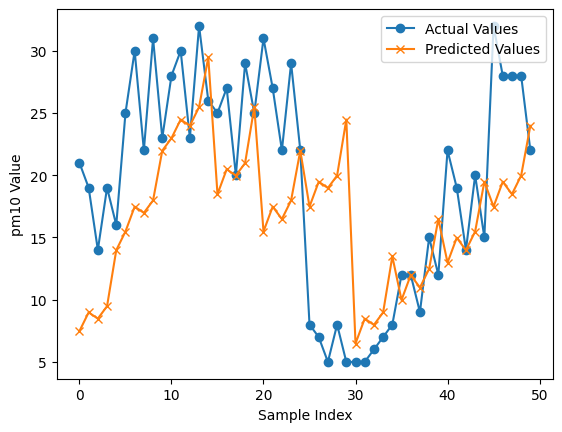

In [308]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the " pm10" column to numeric (assuming it contains numeric values)
df_actual_values[" pm10"] = pd.to_numeric(df_actual_values[" pm10"], errors="coerce")

# Create a range of indices for the x-axis (0, 1, 2, ...)
x = range(len(manual_results))

# Plot the actual values and predicted values
plt.plot(x, df_actual_values[" pm10"].values, label='Actual Values', marker='o')
plt.plot(x, manual_results, label='Predicted Values', marker='x')

# Set labels and legend
plt.xlabel('Sample Index')
plt.ylabel('pm10 Value')
plt.legend()

# Show the plot
plt.show()
